In [1]:
import numpy as np
import numpy.linalg as la
import scipy.stats as ss
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import Image

%precision 10
%matplotlib inline

# Linear Regression

## Synthetic Datasets

We will generate a number of data sets. The datapoints  $\mathbf{x}=(𝑥_1,⋯,𝑥_𝑑)$  have  $𝑑$  features with values in the closed interval  [−1,1] . Each dataset has  $𝑁$  datapoints generated uniformly at random. 

The general equation for a **linear function** in $d$ variables is given by

$$f(x_1, \cdots, x_d) = \sum_{i=1}^d w_i x_i + b$$

If we introduce an extra variable $x_0 = 1$ and set $w_0 = b$, this can be rewritten 

$$f(x_1, \cdots, x_d) = \sum_{i=0}^{d} w_i x_i$$

or in vector notation

$$f(\mathbf{x}) = \mathbf{w}^\top \mathbf{x} = \mathbf{w} . \mathbf{x}$$

## Target function$f : X \rightarrow \mathbb{R}$

Given the weight vector $\mathbf{w}$ representing the target function $f(\mathbf{x}$
we can now generate the data.

For $n=1, \cdots, N$, $\mathbf{x}_n$ is generated uniformly at random and the
corresponding $y_n$ as

$$y_n = f(\mathbf{x}_n) + \epsilon_n \text{ where } \epsilon_n \sim N(0, \sigma^2)$$

where $\epsilon_n$ is sampled from the Gaussian distribution with mean $0$ and variance $\sigma^2$

In the example below we use $\mathbf{w} = (-1, 1)$ corresponding with $f(x_1) = x_1 - 1$

In [2]:
W_f = np.array([-1, 1])

In [3]:
def get_h(weight):
    return lambda x : weight.T@x

In [4]:
def generate_noise(noise_level, N):
    return np.random.normal(loc=0., scale=noise_level, size=N)

In [5]:
def generate_data(w, noise_level, N, d, nbsets):
    nbpoints = N*nbsets
    all_X = np.ones(shape=(nbpoints, 1+d))
    all_X[:, 1:] = np.random.uniform(low=-1, high=+1, size=(nbpoints, d))
    f = get_h(w)
    all_Y = f(all_X.T) + generate_noise(noise_level, N=nbpoints)
    return {'Datasets':all_X,
            'Labels':all_Y, 
            'Noise Level':noise_level,
            'Datapoints per set': N,
            'Dimension': d,
            'Sets': nbsets,
            'Target': f} 

# Finally, select one of the datasets as *training set*

In [6]:
def get_training_set(data, idx=0):
    all_X, all_Y = data['Datasets'], data['Labels']
    N, nb_sets = data['Datapoints per set'], data['Sets']
    assert idx < nb_sets, 'Not enough sets.'
    offset = N*idx
    return all_X[offset:offset+N,:], all_Y[offset:offset+N]

# Plot the training set and the target function

In [7]:
DATA = generate_data(w=np.array([-1, 1]), noise_level=0.5, N=100, d=1, nbsets=10)

In [8]:
X, Y = get_training_set(data=DATA, idx=0)

In [9]:
def draw_h(w, color='blue', dim=1, ):
    def get_h(w):
        return lambda x : w[1]*x + w[0]
    h = get_h(w)
    x = np.linspace(start=-1.0, stop=1.0, endpoint=True, num=50)
    plt.plot(x, h(x), color)

In [10]:
def plot_training_set(X, Y, w):
    plt.scatter(X[:, 1], Y, color='green')
    draw_h(w)

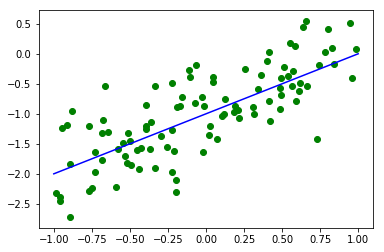

In [11]:
plot_training_set(X, Y, w=W_f)

# Linear Regression

In [12]:
def LinearRegression(X, Y):
    return la.pinv(X)@Y

In [13]:
def pinv(x):
    inv = la.inv(x.T@x)
    return inv@x.T

def LinearRegression2(X, Y):
    return pinv(X)@Y

np.allclose(LinearRegression(X, Y), LinearRegression2(X,Y))

%timeit LinearRegression2(X, Y)

# Plot the training set and the target function

$$h(\mathbf{x}) = \mathbf{w}^\top \mathbf{x} \triangleq \mathbf{w} .\mathbf{x}$$

## Impact of *noise* and *size of the training set* on Linear Regression

In [14]:
def run(data):
    nbsets = data['Sets']
    weights = []
    for i in np.arange(nbsets):
        X, Y = get_training_set(data, idx=i)
        weights.append(LinearRegression2(X, Y))
    return weights

In [15]:
def plot_run(w, weights):
    fig, ax = plt.subplots()
    ax.set_xlim((-1, 1))
    ax.set_ylim((-2, 0))
    draw_h(w)
    for w_in in weights:
        draw_h(w=w_in, color='brown')

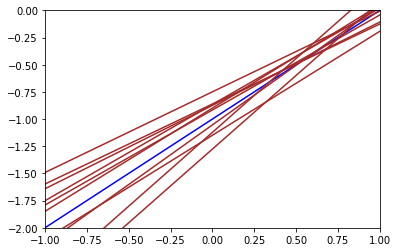

In [16]:
plot_run(w=W_f, weights=run(data=generate_data(noise_level=1, 
                                               N=50, 
                                               w=W_f, d=1, nbsets=10)))